### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python


## Environment preparation

In [63]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

%matplotlib inline
sns.set(rc = {'figure.figsize':(15,10)})

## Assignment activity 1: 

### Project access:
Insert URL (to your public GitHub repository) and a screenshot - double click cell to edit
- [My Github Repo](https://github.com/username/reponame)
- Screenshot demo.

!['My Github screenshot](http://github.com/apvoges/lse-ca/blob/main/GitHubScreenshot.png?raw=true)

GitHub repo is a great way to track changes and handle snapshot of code and project. This is especially useful for projects involve coding, as version control systems allows user to revert back to previous copy when error introduced during editing or accidental deletion.

## Assignment activity 2 (basic data exploration): 

### Objectives

- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features.
- Identify missing data.
- Filter/subset data.
- determining the vaccination status in Gibraltar by identifying the number of people who:
    - are vaccinated
    - have received the first dose
    - have received the second dose.
- Aggregate data (totals and by month).
- Note observations.

In [2]:
# Load the COVID-19 cases and vaccine data sets as cov and vac respectively
cov = pd.read_csv('Data/covid_19_uk_cases.csv')
vac = pd.read_csv('Data/covid_19_uk_vaccinated.csv')

### COVID-19 UK cases:

In [3]:
# View cov data frame
display(cov)
print(cov.shape)
print(cov.dtypes)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


(7584, 12)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object


In [4]:
# Determine any missing values in cov df
print("Rows with missing data:")
display(cov[cov.isna().any(axis=1)])
cov.isna().sum()

Rows with missing data:


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

In [46]:
# Fill na with previous record
cov.fillna(method = 'ffill', inplace = True)

In [43]:
state_list = cov['Province/State'].unique().tolist()
print(f"Number of Province/State recorded: {len(state_list)}")
print(state_list)

Number of Province/State recorded: 12
['Anguilla', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar', 'Isle of Man', 'Montserrat', 'Saint Helena, Ascension and Tristan da Cunha', 'Turks and Caicos Islands', 'Others']


### COVID-19 UK vaccinated data set:

In [6]:
# View cov data frame
display(vac)
print(vac.shape)
print(vac.dtypes)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,0,0,0


(7584, 11)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [7]:
# Determine any missing values in vac df
print("Rows with missing data:")
display(vac[vac.isna().any(axis=1)])
vac.isna().sum()

Rows with missing data:


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose


Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

In [8]:
# Set Date to datetime format
cov['Date'] = pd.to_datetime(cov['Date'])
vac['Date'] = pd.to_datetime(vac['Date'])

### Explore Gibraltar data

In [9]:
# Create DataFrame based on Gibraltar covid cases data; 
# Subset with Deaths, Cases, Recovered and Hospitalised, index by Date.
gib = cov[cov['Province/State']=='Gibraltar'][['Date', 'Deaths', 'Cases', 'Recovered', 'Hospitalised']]
gib.set_index('Date', inplace=True)
# print the whole DataFrame
pd.set_option("display.max_rows", None)
gib

,Deaths,Cases,Recovered,Hospitalised
Date,,,,
2020-01-22,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0


In [10]:
# Explore Gibraltar data with describe method
display(gib.describe())

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [11]:
# Create DataFrame based on Gibraltar vaccine data
# Subset Gibraltar vaccine data with Vaccinated, First Dose and Second Dose, index by Date
gib_v = vac[vac['Province/State']=='Gibraltar'][['Date', 'Vaccinated', 'First Dose', 'Second Dose']]
gib_v.set_index('Date', inplace=True)
gib_v

,Vaccinated,First Dose,Second Dose
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
2020-01-27,0,0,0
2020-01-28,0,0,0
2020-01-29,0,0,0
2020-01-30,0,0,0


In [12]:
# Explore Gibraltar vaccine data with describe method
display(gib_v.describe())

,Vaccinated,First Dose,Second Dose
count,632.000000,632.000000,632.000000
mean,8870.318038,9289.218354,8870.318038
std,15439.487761,16287.230372,15439.487761
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,14594.000000,12488.750000,14594.000000
max,69619.000000,94038.000000,69619.000000


In [13]:
# Identify total number of people who have vaccinated, received first dose and received second dose
gib_v.apply(sum)

Vaccinated     5606041
First Dose     5870786
Second Dose    5606041
dtype: int64

In [14]:
gib_v.groupby([gib_v.index.year.rename('Year'), gib_v.index.month.rename('Month')]).sum()

Vaccinated  First Dose  Second Dose
Year Month                                     
2020 1               0           0            0
     2               0           0            0
     3               0           0            0
     4               0           0            0
     5               0           0            0
     6               0           0            0
     7               0           0            0
     8               0           0            0
     9               0           0            0
     10              0           0            0
     11              0           0            0
     12              0           0            0
2021 1           12851      876224        12851
     2           40201     1372385        40201
     3          462203     1358999       462203
     4         1305483      401847      1305483
     5         1347172      639366      1347172
     6          914184      672977       914184
     7          659247      244424       659247
     8          573475      158939       573475
     9          248983       96945       248983
     10          42242       48680        42242

# 

## Summary

- Did you notice anything interesting about the data?
    - Total of 12 Province/State in the COVID cases data: 'Anguilla', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar', 'Isle of Man', 'Montserrat', 'Saint Helena, Ascension and Tristan da Cunha', 'Turks and Caicos Islands', 'Others'.
    - In vaccine data set, `Vaccinated` column is equivalent `Second Dose` column; Looking at the data dictionary, column `Vaccinated` is better shown as a cumulative data to avoid duplicated data.
    
- Does the DataFrame have a default index? 
    - No default index, can use Date column as index when subset by Province/State.
    
- How has the number of vaccinated individuals changed over time? What might these changes indicate? Include reasons to support your rationale.
    - For Gilbratar data, number of people who receive the first dose increases to quickly in the first few months, reach its highest at 3rd month and the rate of receiving first dose drops from there after.
    - For second dose, number of people receive vaccines reach highest at month 5 after the vaccination program. 2 months "behind" the first dose. This is likely due to the time gap required between first and second dose.
    - The rate of receiving second dose drops after the peak at 5 month.
    
- On which date(s) are there values missing, and from which columns and rows are these values missing? Which states or provinces do the missing values belong to?
    - Only two record of missing data found in COVID cases data set and none found in vaccine data set.
    - The missing data belong to Bermuda Province/State on date: 2020-09-21 and 2020-09-22.

- Is there anything unusual about the filtered Gilbraltar DataFrame? Include reasons to support your rationale.
    - From the data shows a total of 5.6 million people vaccinated (received a second dose), but the total population of Gilbraltar as recorded in 2020 is only 33,691.


## Assignment activity 3: 


### Objective:
- Identify the area that has the greatest number of people who have received a first dose but not a second dose.
- Merge and explore the data.
- Convert the data type of the Date column from object to DateTime.
- Create a data set that meets the expected parameters.
- Add calculated features to DataFrames (difference between first and second dose vaccinations).
- Filter and sort output.
- Observe totals and percentages as a total and over time.
- Note observations.

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: `Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised`.

### Merge Data

In [15]:
# print 10 rows of DataFrame only
pd.set_option("display.max_rows", 10)

In [16]:
# Join cov and vac
covid_a = pd.merge(cov, vac, how = 'left', on = ['Province/State', 'Country/Region', 'Date'])
print(covid_a.shape)
print(covid_a.dtypes)
covid_a

(7584, 20)
Province/State                 object
Country/Region                 object
Lat_x                         float64
Long_x                        float64
ISO 3166-1 Alpha 3-Codes_x     object
                               ...   
Sub-region Name_y              object
Intermediate Region Code_y      int64
Vaccinated                      int64
First Dose                      int64
Second Dose                     int64
Length: 20, dtype: object


,Province/State,Country/Region,Lat_x,Long_x,ISO 3166-1 Alpha 3-Codes_x,Sub-region Name_x,Intermediate Region Code_x,Date,Deaths,Cases,Recovered,Hospitalised,Lat_y,Long_y,ISO 3166-1 Alpha 3-Codes_y,Sub-region Name_y,Intermediate Region Code_y,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0,55.3781,-3.4360,GBR,Northern Europe,0,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0,55.3781,-3.4360,GBR,Northern Europe,0,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0,55.3781,-3.4360,GBR,Northern Europe,0,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0,55.3781,-3.4360,GBR,Northern Europe,0,0,0,0


In [17]:
# Clean up / drop unnecessary columns 
covid = covid_a[['Province/State', 'Country/Region', 'Date', 'Vaccinated', 'First Dose', 'Second Dose', 
              'Deaths', 'Cases', 'Recovered', 'Hospitalised']]
print(covid.shape)
print(covid.dtypes)
covid

(7584, 10)
Province/State            object
Country/Region            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
dtype: object


,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,1070,1216,1070,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,2021-10-11,1300,1604,1300,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,2021-10-12,1482,2027,1482,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,2021-10-13,0,0,0,138080.0,8272883.0,0.0,0.0


### Total vaccinations over time

In [74]:
# print the whole DataFrame
pd.set_option("display.max_rows", None)
# Sum vaccine data per date
vac_sum = covid.groupby('Date')[['Vaccinated', 'First Dose', 'Second Dose']].sum()
# Aggregate Vaccine data per month
vac_sum.groupby([vac_sum.index.year.rename('Year'), vac_sum.index.month.rename('Month')]).sum().iloc[12:,]

Vaccinated  First Dose  Second Dose
Year Month                                     
2021 1          102807     7009791       102807
     2          321611    10979089       321611
     3         3697646    10872004      3697646
     4        10443858     3214759     10443858
     5        10777396     5114952     10777396
     6         7313473     5383815      7313473
     7         5273975     1955401      5273975
     8         4587807     1271518      4587807
     9         1991847      775585      1991847
     10         337925      389450       337925

In [48]:
# Total number of vaccinated
vac_sum.apply(sum)

Vaccinated     44848345
First Dose     46966364
Second Dose    44848345
dtype: int64

In [50]:
# Total vaccination data per Province/State
vac_state = covid.groupby(['Province/State'])[['Vaccinated', 'First Dose', 'Second Dose']].sum().reset_index()
vac_state

,Province/State,Vaccinated,First Dose,Second Dose
0,Anguilla,4709072,4931470,4709072
1,Bermuda,2690908,2817981,2690908
2,British Virgin Islands,4933315,5166303,4933315
3,Cayman Islands,3363624,3522476,3363624
4,Channel Islands,3139385,3287646,3139385
5,Falkland Islands (Malvinas),3587869,3757307,3587869
6,Gibraltar,5606041,5870786,5606041
7,Isle of Man,4036345,4226984,4036345
8,Montserrat,5157560,5401128,5157560
9,Others,2466669,2583151,2466669


In [51]:
# Which Province/State has the highest number of individuals who have received a first dose but not a second dose?
vac_state['First Dose only'] = vac_state['First Dose'] - vac_state['Second Dose']
vac_state.sort_values(by='First Dose only', ascending=False)

,Province/State,Vaccinated,First Dose,Second Dose,First Dose only
6,Gibraltar,5606041,5870786,5606041,264745
8,Montserrat,5157560,5401128,5157560,243568
2,British Virgin Islands,4933315,5166303,4933315,232988
0,Anguilla,4709072,4931470,4709072,222398
7,Isle of Man,4036345,4226984,4036345,190639
5,Falkland Islands (Malvinas),3587869,3757307,3587869,169438
3,Cayman Islands,3363624,3522476,3363624,158852
4,Channel Islands,3139385,3287646,3139385,148261
11,Turks and Caicos Islands,2915136,3052822,2915136,137686
1,Bermuda,2690908,2817981,2690908,127073


In [52]:
# Which Province/State has the highest percentage of individuals who have received a first dose but not a second dose.
vac_state['Percentage'] = 100*(vac_state['First Dose only']/(vac_state['First Dose']))
vac_state.sort_values(by='Percentage', ascending=False)

,Province/State,Vaccinated,First Dose,Second Dose,First Dose only,Percentage
11,Turks and Caicos Islands,2915136,3052822,2915136,137686,4.510122
7,Isle of Man,4036345,4226984,4036345,190639,4.510048
0,Anguilla,4709072,4931470,4709072,222398,4.509771
2,British Virgin Islands,4933315,5166303,4933315,232988,4.509763
3,Cayman Islands,3363624,3522476,3363624,158852,4.509669
4,Channel Islands,3139385,3287646,3139385,148261,4.509640
8,Montserrat,5157560,5401128,5157560,243568,4.509577
5,Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.509560
6,Gibraltar,5606041,5870786,5606041,264745,4.509532
1,Bermuda,2690908,2817981,2690908,127073,4.509363


## Summary
- Which Province/State has the highest number of individuals who have received a first dose but not a second dose?
    - Gibraltar has the highest numbers of first dose only
- Which Province/State has the highest percentage of individuals who have received a first dose but not a second dose.
    - Turks and Calcos Islands has the highest percentage, however percentages are very similar across regions
- How has the number of vaccinated individuals and individuals who have received the first and second doses, changed over time?
    - First dose number increase rapidly in the first three months, while second dose lags behind two months, due to the nature of vaccination programs.

In [ ]:
# print 10 rows of DataFrame only
pd.set_option("display.max_rows", 10)

## Assignment activity 4: 

### Objective
1. Create a chart that communicates the number of individuals who have received a second dose compared to individuals who have received their first dose in each area.
2. Create a visualisation that communicates the number of deaths per month in each region. Review the visualisation to determine whether there are areas that hit higher peaks earlier than other areas.
3. Identify which region has the greatest number of recoveries. Then, create a visualisation that communicates the number of recoveries per month in each area. Review the visualisation to determine whether this has been consistent over time.

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

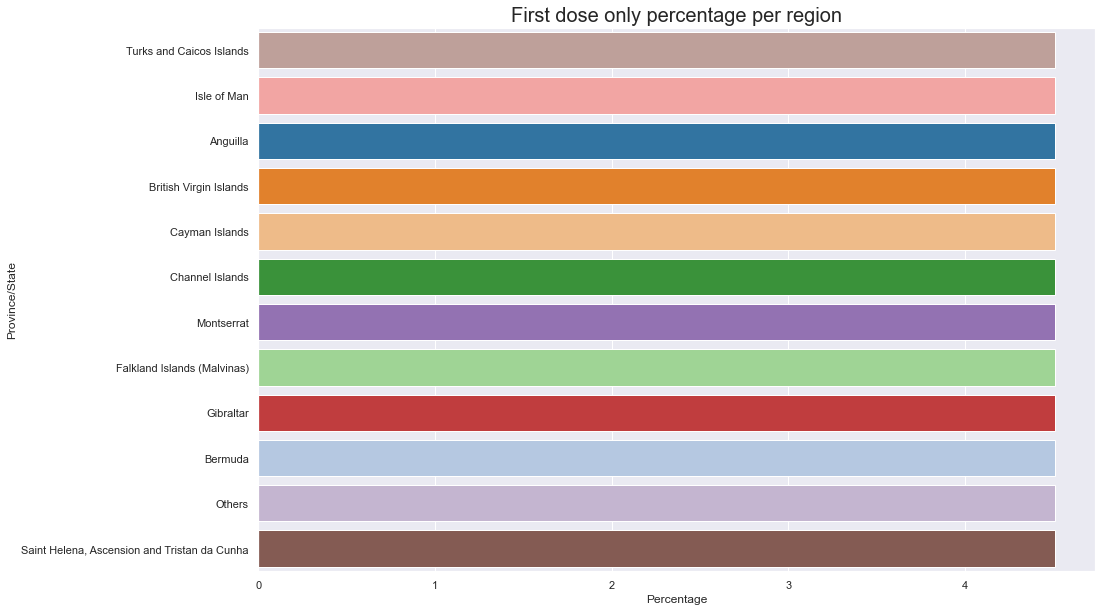

In [65]:
# Create barplot that shows the highest percentage of individuals received first dose only in each area.
col = sns.color_palette('tab20', 12)
color_order = [col[i] for i in vac_state.sort_values('Percentage', ascending=False).index.tolist()]
p = sns.barplot(y='Province/State', x='Percentage', data=vac_state, 
            order=vac_state.sort_values('Percentage', ascending=False)['Province/State'],
            palette=color_order)
p.set_title("First dose only percentage per region", fontsize = 20)
# Save fig
plt.savefig('Images/First_Dose_only_Percentage.png', dpi=300, bbox_inches = "tight")

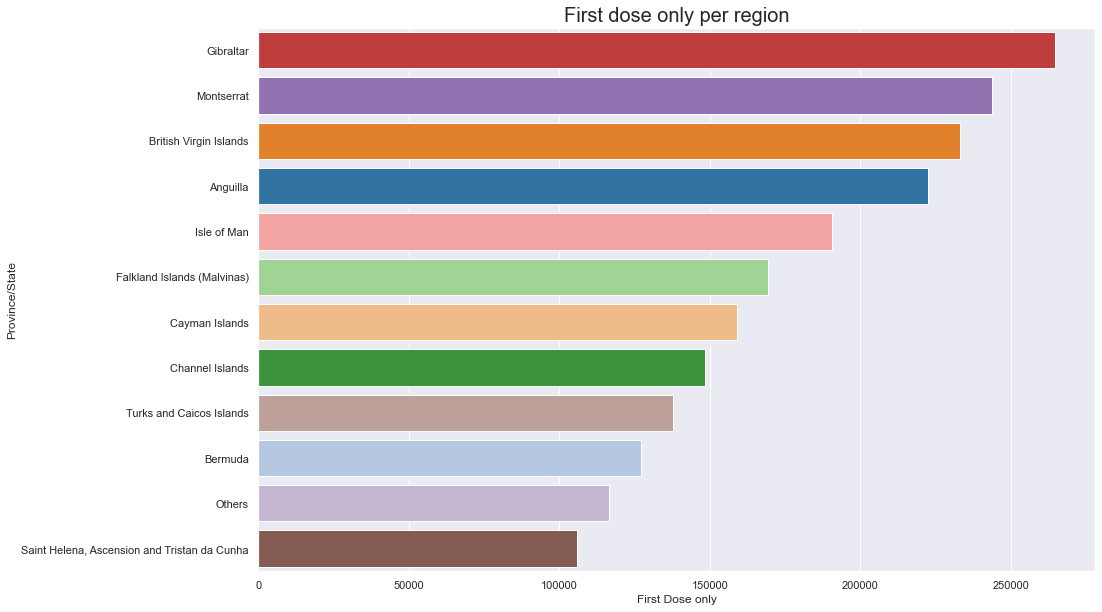

In [67]:
# Create barplot that shows the highest absolute numbers of individuals received first dose only in each area.
color_order = [col[i] for i in vac_state.sort_values('First Dose only', ascending=False).index.tolist()]
p = sns.barplot(y='Province/State', x='First Dose only', data=vac_state, 
            order=vac_state.sort_values('First Dose only', ascending=False)['Province/State'],
            palette=color_order)
p.set_title("First dose only per region", fontsize = 20)
# Save fig
plt.savefig('Images/First_Dose_only.png', dpi=300, bbox_inches = "tight")

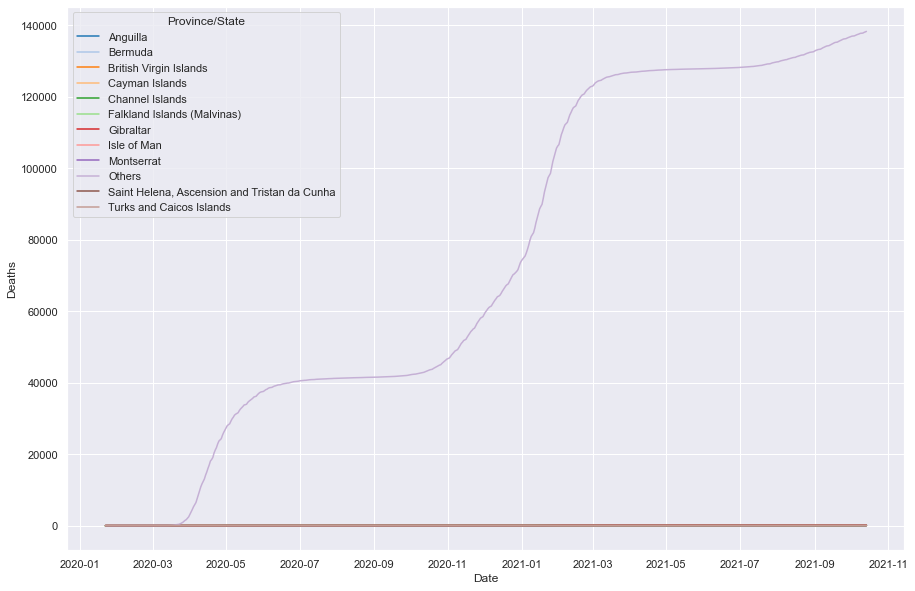

In [25]:
# Create time series to display the trend of deaths across all regions over time. 

fig, ax = plt.subplots()
# sort data by Province/State to keep consistent region color coding
sns.lineplot(x='Date', y='Deaths', data=covid.sort_values('Province/State'), hue='Province/State', palette=col, ax=ax)
plt.show()

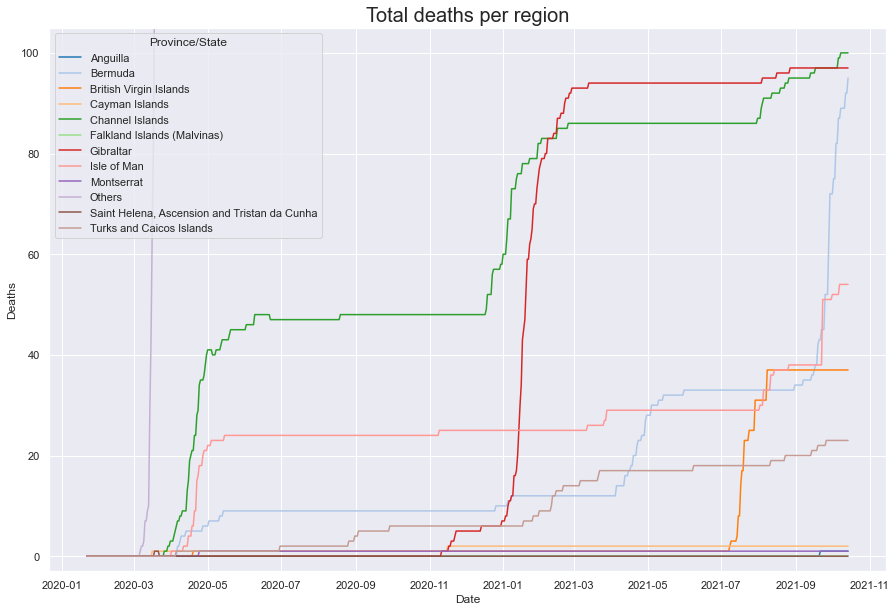

In [68]:
fig, ax = plt.subplots()
p = sns.lineplot(x='Date', y='Deaths', data=covid.sort_values('Province/State'), 
                 hue='Province/State', palette=col, ax=ax)
p.set_title("Total deaths per region", fontsize = 20)
# limit y axis to show trends from regions with lower deaths
ax.set_ylim(-3, 105)
plt.show()

In [27]:
# Smooth out the data by looking at monthly (month-end) figures
covid_M = covid.groupby(['Province/State', covid.Date.dt.year.rename('Year'), covid.Date.dt.month.rename('Month')])\
                [['Recovered','Deaths']].max().reset_index()
covid_M['Day'] = 1
covid_M['Date'] = pd.to_datetime(covid_M[['Year', 'Month', 'Day']]) + pd.offsets.MonthEnd(0) 
# Replace recovery data with previous record when equal to 0
for i in range(1, len(covid_M)):
    if covid_M.loc[i, 'Recovered'] == 0 and covid_M.loc[i, 'Province/State'] == covid_M.loc[i-1, 'Province/State']:
        covid_M.loc[i, 'Recovered'] = covid_M.loc[i-1, 'Recovered']

covid_M


,Province/State,Year,Month,Recovered,Deaths,Day,Date
0,Anguilla,2020,1,0.0,0.0,1,2020-01-31
1,Anguilla,2020,2,0.0,0.0,1,2020-02-29
2,Anguilla,2020,3,0.0,0.0,1,2020-03-31
3,Anguilla,2020,4,3.0,0.0,1,2020-04-30
4,Anguilla,2020,5,3.0,0.0,1,2020-05-31
...,...,...,...,...,...,...,...
259,Turks and Caicos Islands,2021,6,2398.0,18.0,1,2021-06-30
260,Turks and Caicos Islands,2021,7,2431.0,18.0,1,2021-07-31
261,Turks and Caicos Islands,2021,8,2433.0,20.0,1,2021-08-31
262,Turks and Caicos Islands,2021,9,2433.0,23.0,1,2021-09-30


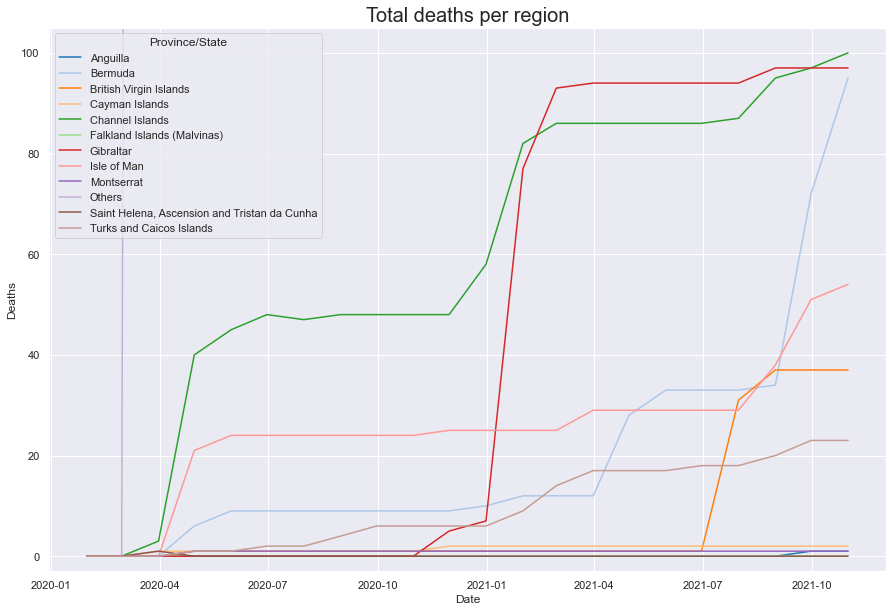

In [70]:
fig, ax = plt.subplots()
p = sns.lineplot(x='Date', y='Deaths', data=covid_M, hue='Province/State', palette=col, ax=ax)
p.set_title("Total deaths per region", fontsize = 20)
# limit y axis to show trends from regions with lower deaths
ax.set_ylim(-3, 105)
# Save fig
plt.savefig('Images/Deaths_per_region.png', dpi=300, bbox_inches = "tight")
plt.show()

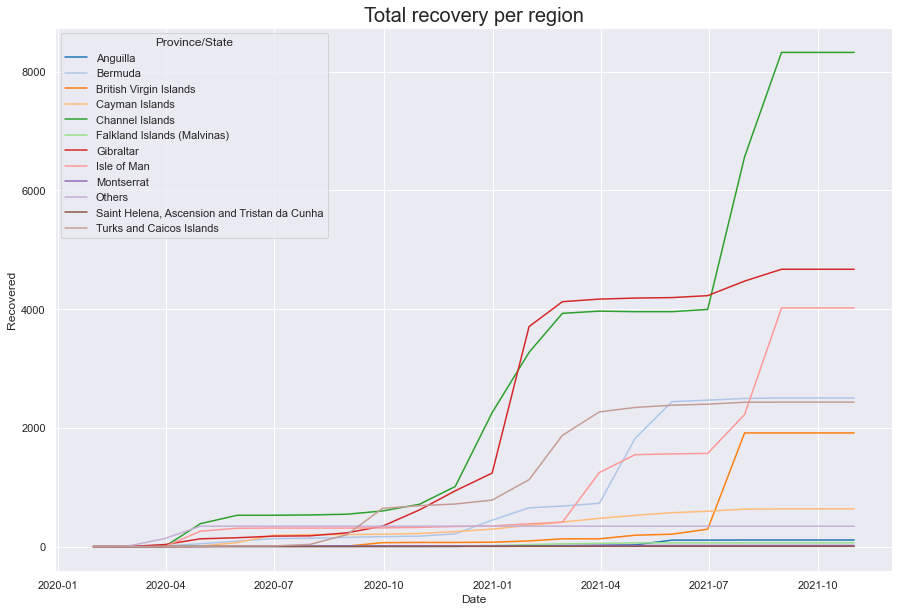

In [71]:
# Identify which region has the greatest number of recoveries and visualise
fig, ax = plt.subplots()
p = sns.lineplot(x='Date', y='Recovered', data=covid_M, hue='Province/State', palette=col, ax=ax)
p.set_title("Total recovery per region", fontsize = 20)
# limit y axis to show trends from regions with lower deaths
# Save fig
plt.savefig('Images/Recovery_per_region.png', dpi=300, bbox_inches = "tight")

plt.show()

## Summary
- Vaccinations started in January 2021 and seems to help bring down deaths and helps recovery
- Two peaks in the recovery and deaths data
- Data stops in the last two months, will need to extend data from previous records

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

Create a new DataFrame with only text values and answer the following questions:
- Identify the hashtags.
    - Consider creating a list of values containing the # symbol.
    - Next, think about how you can leverage the loop function to create the list followed by creating a Series to count the values in the list.
    - Display 30 records.
- Identify the top trending hashtags.
    - You may want to prepare a visualisation to more easily interpret the data. Convert the relevant Series that you created into a DataFrame.
    - Make sure the newly created DataFrame follows all the characteristics of a Pandas DataFrame. Consider naming the columns and fixing the data types. 
    - Before visualising the data, view the DataFrame to assess the data. You may want to exclude the words that don't have enough counts to visualise the data.
    - Next, display the data in a visualisation and identify the top trending hashtags related to COVID. To determine which hashtags are related to COVID, search for hashtags with words such as COVID or corona.


### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

In [31]:
# Import the tweet data set
tweets = pd.read_csv('Data/tweets.csv')

In [32]:
# Explore the data: info(), head()
print(tweets.shape)
print(tweets.dtypes)
print(tweets.info())
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%d/%m/%Y')
tweets.head()

(3960, 21)
created_at               object
id                      float64
id_str                  float64
text                     object
truncated                object
                         ...   
retweeted                object
lang                     object
possibly_sensitive       object
quoted_status_id        float64
quoted_status_id_str    float64
Length: 21, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64


,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,2022-05-23,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,2022-05-23,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,2022-05-23,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,2022-05-23,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,2022-05-23,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [33]:
# Explore the structure, count the tweets, get the elements of interest
print(tweets.isna().sum())
tweets[tweets.created_at.isna()]
# Drop rows with NaN created_at
tweets.dropna(subset=['created_at'], inplace=True)
tweets.shape

created_at                 1
id                         1
id_str                     1
text                       1
truncated                  1
                        ... 
retweeted                  1
lang                       1
possibly_sensitive       830
quoted_status_id        3960
quoted_status_id_str    3960
Length: 21, dtype: int64


(3959, 21)

In [34]:
# Create a DataFrame with the text only
text = tweets[['created_at','text']]
display(text.head())

,created_at,text
0,2022-05-23,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
1,2022-05-23,#COVID19 is linked to more #diabetes diagnoses...
2,2022-05-23,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
3,2022-05-23,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
4,2022-05-23,Advanced healthcare at your fingertips\nhttps:...


In [35]:
# Loop through the messages and build a list of values containing the #-symbol
print(len(text))
hashtags = []
for d in set(text['created_at']):
    sub = text[text['created_at']==d]
    tags = [[d.date(),tag] for t in sub['text'] for tag in t.split() if tag.startswith('#')]
    hashtags.extend(tags)

print(f"{len(hashtags)} hashtags found in given data.")

3959
13665 hashtags found in given data.


In [36]:
# Convert list of hashtags to a dataframe
tags_df = pd.DataFrame(hashtags, columns=['created_at', 'tags'])
tags_df.sort_values('created_at', inplace=True)
tags_df['created_at'] = pd.to_datetime(tags_df['created_at'])
print(tags_df.shape)
print(tags_df.dtypes)
tags_df.head(30)

(13665, 2)
created_at    datetime64[ns]
tags                  object
dtype: object


,created_at,tags
13664,2022-05-15,#NorthernIreland
13438,2022-05-15,#GetVaccinated
13439,2022-05-15,#pandemic
13440,2022-05-15,#COVID19
13441,2022-05-15,#CovidIsNotOver
...,...,...
13421,2022-05-15,#CovidIsNotOver
13422,2022-05-15,#California
13423,2022-05-15,#Marvel
13424,2022-05-15,#DrStrange


In [37]:
# Filter and sort

# Group tags 
tags_df.groupby('created_at').value_counts(ascending=False).reset_index()

,created_at,tags,0
0,2022-05-15,#COVID19,53
1,2022-05-15,#CovidIsNotOver,25
2,2022-05-15,#coronavirus,16
3,2022-05-15,#CoronaUpdate,10
4,2022-05-15,#covid19uk,9
...,...,...,...
5915,2022-05-23,#chinanews,1
5916,2022-05-23,#child,1
5917,2022-05-23,#COVIDIOTS,1
5918,2022-05-23,#fish,1


In [38]:
keyword = '#'
contains_boolean = text['text'].str.contains(keyword, case=False, regex=False)
contain_k = text[contains_boolean.fillna(value=False).values]
contain_k.head(30)

,created_at,text
1,2022-05-23,#COVID19 is linked to more #diabetes diagnoses...
4,2022-05-23,Advanced healthcare at your fingertips\nhttps:...
5,2022-05-23,Deciphering ADA 2021: Minimize Risks for Peopl...
6,2022-05-23,It can’t really be called a pandemic when less...
7,2022-05-23,Out of the hospital from DKA.. now I tested po...
...,...,...
57,2022-05-19,#IDFPodcast - Join host @not_defeated as she w...
60,2022-05-19,"“It took a while to convince me,” said Al-Aly,..."
61,2022-05-19,Decoding the #COVID19 connection with diabetes...
62,2022-05-19,A large new study found that people who recove...


In [39]:
# Plot


### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

## Assignment activity 6: 

- Demonstrate using external function and interpret results.
- Note observations.

In [2]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('Data/covid_19_uk_cases.csv')
ds2 = pd.read_csv('Data/covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [18]:
# Select data for a specific province
''' The Channel Islands are relatively 'remote' and a perfect choice to see how the population responded 
    to the vaccination drive.
'''
sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci.index = pd.to_datetime(sample_ci['Date'])
sample_ci = sample_ci.drop(columns=['Date'])

In [5]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

In [4]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

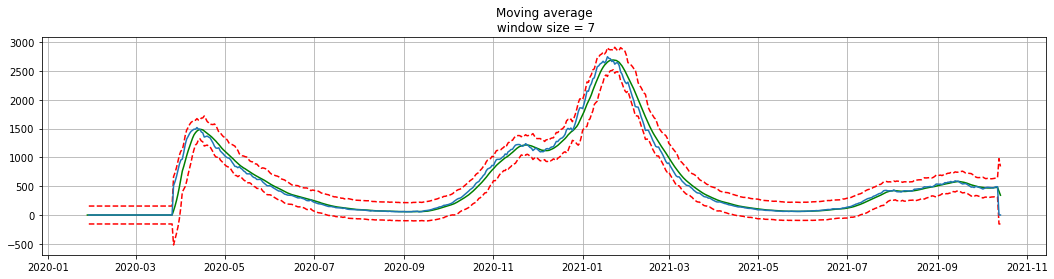

In [19]:
# Demonstrate the use of the function to plot moving averages
plot_moving_average(sample_ci['Hospitalised'], window=7, plot_intervals=True)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [20]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Hospitalised,error
Date,,,
2020-03-27,Channel Islands,509.0,436.285714
2020-03-28,Channel Islands,579.0,423.571429
2020-03-29,Channel Islands,667.0,416.285714


In [42]:
s['rolling'] = s_rolling
display(s.loc['2020-03-15':'2020-04-15'])
#s.loc['2020-03-27':'2020-04-02']['Hospitalised'].astype(int).astype(str).str.cat(sep='+')

,Province/State,Hospitalised,error,rolling
Date,,,,
2020-03-15,Channel Islands,0.0,0.000000,0.000000
2020-03-16,Channel Islands,0.0,0.000000,0.000000
2020-03-17,Channel Islands,0.0,0.000000,0.000000
2020-03-18,Channel Islands,0.0,0.000000,0.000000
2020-03-19,Channel Islands,0.0,0.000000,0.000000
2020-03-20,Channel Islands,0.0,0.000000,0.000000
2020-03-21,Channel Islands,0.0,0.000000,0.000000
2020-03-22,Channel Islands,0.0,0.000000,0.000000
2020-03-23,Channel Islands,0.0,0.000000,0.000000


The code above shows 
- error = absolute value of daily hospitalised - rolling
- actual records of data starts appearing on date 2020-03-27, but data set starts from a much earlier date with value recorded as 0
- hence the first 7 days of non-zero rolling data are not credible, e.g. on 2020-03-27 `rolling = 509/7` compare to `rolling = (509+579+667+777+882+955+971)/7` on 2020-04-02.
- therefore finding the biggest difference between daily and rolling will have more meaning when ignoring the first 7 days of rolling data appearing

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

#### Question 3.1
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

    A qualitative method is based on the opinion and judgments of consumers and experts, for example, the analysis of customer feedback obtained from a social media platform. This type of data is more vulnerable to subjective criticism or misinterpretation. 

    Qualitative methods are useful if you have insufficient historic data to make any statistically relevant conclusions. This model can be useful in providing short-term predictions for companies, products, and services. It can also be 'triangulated' with statistical methods to help you guide your modelling.

    However, collecting and analysing qualitative data is more expensive than quantitative data. More effort is needed to consolidate data due to the unavailability of historic data, plus the cost of expert consultations and other expenses in the forecasting process. For example, open-ended questions extracted from a social media platform cannot be analysed in Python as is, you first need to convert it or create classes/ranks/categories to fit the data into 'boxes'. 

    Select the icons in the infographic to explore the more common qualitative forecasting methods used by businesses.

    These approaches are concerned only with numerical data that is easily quantifiable and perfect for statistical analysis. It’s effective when there is accurate historic data available to predict the probability of future events. Quantitative methods involve learning patterns from data to help us better understand how a process works, or to predict future events. It includes in-house data (sales numbers) and professionally gathered data (census statistics).  

    Quantitative forecasting methods can be further divided into causal, correlational or observational, and time-series methods. We’ll briefly touch on multivariate forecasting and then take a closer look at time-series forecasting. But before getting into the details let’s look at the nuances of methods and models.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

YOUR ANSWER HERE.

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

YOUR ANSWER HERE.